# 스타벅스 이디야 위치 분석

In [79]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프에 한글입력
from matplotlib import font_manager, rc
path='C:\Windows\Fonts\malgun.ttf'
font_name= font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

# seaborn 스타일 설정
sns.set(style='ticks', color_codes=True)

In [35]:
import glob
import pandas as pd
import warnings
# warning message 숨기기
warnings.filterwarnings(action='ignore')

# 2019년도 6월 데이터 
path=r'./datas/06'
stores_datas= glob.glob(path+'/*.csv')

concat_csv_files=[]
for csv_file in stores_datas:
    df= pd.read_csv(csv_file, encoding='utf-8')
    print('file-name: {}\nsize: {}'.format(csv_file, df.shape))
    concat_csv_files.append(df)

store_datas= pd.concat(concat_csv_files, ignore_index=True)
store_datas.head(3)

file-name: ./datas/06\소상공인시장진흥공단_상가업소정보_201906_01.csv
size: (565016, 39)
file-name: ./datas/06\소상공인시장진흥공단_상가업소정보_201906_02.csv
size: (520497, 39)
file-name: ./datas/06\소상공인시장진흥공단_상가업소정보_201906_03.csv
size: (857672, 39)
file-name: ./datas/06\소상공인시장진흥공단_상가업소정보_201906_04.csv
size: (758611, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080.0,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010.0,8545.0,NaN,1,NaN,126.899220,37.471711
2,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726.0,46977.0,NaN,1,26,128.980455,35.159774


# 컬럼 확인

39개의 컬럼으로 구성되어있다.<br>
프로젝트에 있어서 필요한 컬럼은

- 상호명
- 시도명 (ex. 서울특별시, 인천광역시, ....)
- 지번 주소
- 도로명 주소
- 위도
- 경도

In [36]:
store_datas.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [37]:
# starbucks와 이디야 데이터를 구합니다. (전국을 대상으로)
df_cafe=store_datas[ store_datas['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|이디야|ediya|EDIYA',na=False)]
df_cafe.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1219,19976038,스타벅스,이태원점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1117013000101270029009542,NaN,서울특별시 용산구 이태원로 188,140200.0,4406.0,NaN,NaN,29,126.994781,37.534303
1676,25435527,이디야커피,신길역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1156013200100590002019075,엔씨티오피스텔,서울특별시 영등포구 영등포로 353,150050.0,7318.0,NaN,1,NaN,126.918062,37.515118
1902,20034215,이디야커피,안락뜨란채점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2626010200101510011018170,NaN,부산광역시 동래구 연안로 59,607100.0,47898.0,NaN,NaN,NaN,129.107693,35.193129


In [41]:
# 브랜드명 컬럼을 새로 만든다.
# 브랜드명 = 스타벅스
df_cafe.loc[ df_cafe['상호명'].str.contains('스타벅스|STARBUCKS|starbucks'), '브랜드명']= '스타벅스'

# 브랜드명 =이디야
df_cafe['브랜드명']= df_cafe['브랜드명'].fillna('이디야')
df_cafe.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,브랜드명
1219,19976038,스타벅스,이태원점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,서울특별시 용산구 이태원로 188,140200.0,4406.0,NaN,NaN,29,126.994781,37.534303,스타벅스
1676,25435527,이디야커피,신길역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,엔씨티오피스텔,서울특별시 영등포구 영등포로 353,150050.0,7318.0,NaN,1,NaN,126.918062,37.515118,이디야
1902,20034215,이디야커피,안락뜨란채점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,NaN,부산광역시 동래구 연안로 59,607100.0,47898.0,NaN,NaN,NaN,129.107693,35.193129,이디야


# 시도명에 따른 스타벅스, 이디야 분포 그래프 나타내기

In [42]:
df_cafe['시도명'].value_counts()

서울특별시      1003
경기도         835
부산광역시       272
인천광역시       210
경상남도        171
경상북도        130
대구광역시       112
전라북도        105
강원도         102
울산광역시        99
광주광역시        93
충청남도         91
전라남도         81
충청북도         79
대전광역시        73
제주특별자치도      34
세종특별자치시      20
Name: 시도명, dtype: int64

In [100]:
df_cafe.loc[(df_cafe['시도명']=='서울특별시'),'브랜드명' ].value_counts()

스타벅스    502
이디야     501
Name: 브랜드명, dtype: int64

<Figure size 1440x720 with 0 Axes>

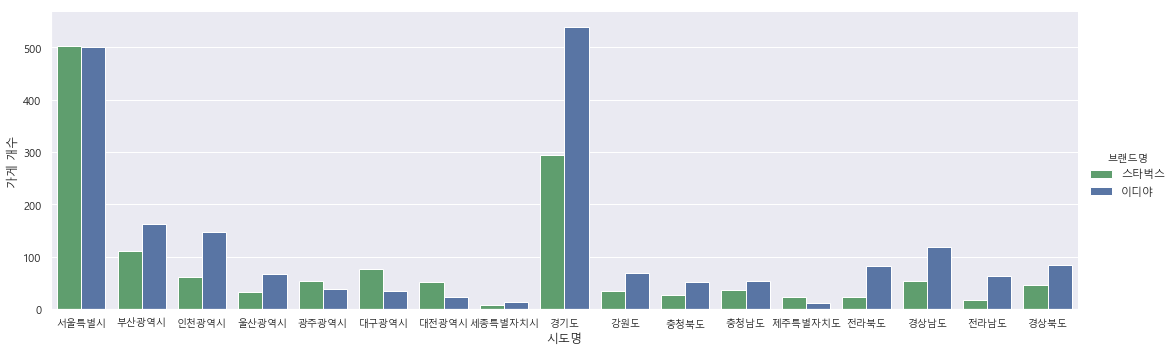

In [98]:
plt.figure(figsize=(20,10))
plt.rc('font',family=font_name)
palette_es={'이디야':'C0', '스타벅스':'C2'}
city_graph=sns.catplot(x='시도명', kind='count',hue='브랜드명', palette=palette_es, data=df_cafe, aspect=3 )
city_graph.set(xlabel='시도명', ylabel='가게 개수')
plt.show()

<br><br>

# Groupby를 이용하여 서울시의 구별로 스타벅스/이디야 매장수 비교

## 1. 서울시의 이디야와 스타벅스 데이터 준비

In [102]:
# 서울 특별시에 위치한 이디야, 스타벅스 카페 데이터를 구합니다.
df_cafe_seoul= df_cafe[ df_cafe['시도명'].str.contains('서울')]
df_cafe_seoul.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,브랜드명
1219,19976038,스타벅스,이태원점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,서울특별시 용산구 이태원로 188,140200.0,4406.0,NaN,NaN,29,126.994781,37.534303,스타벅스
1676,25435527,이디야커피,신길역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,엔씨티오피스텔,서울특별시 영등포구 영등포로 353,150050.0,7318.0,NaN,1,NaN,126.918062,37.515118,이디야
1946,19998811,스타벅스종로3가점,종로3가점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,서울특별시 종로구 종로 113-1,110123.0,3139.0,NaN,1,NaN,126.990207,37.570585,스타벅스
2840,20680373,스타벅스,신사2점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,푸른빌딩,서울특별시 서초구 강남대로 581,137904.0,6530.0,NaN,2,NaN,127.019763,37.513663,스타벅스
2886,20592419,이디야커피,이마트구로점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,이마트구로점,서울특별시 구로구 디지털로32길 43,152050.0,8379.0,NaN,3,NaN,126.897870,37.484385,이디야


<br><br>

## 2. value_counts()를 이용하여 시군구명 컬럼으로  이디야/스타벅스 확인 

In [103]:
df_cafe_seoul['시군구명'].value_counts()

강남구     128
중구       79
서초구      67
영등포구     58
강서구      58
송파구      55
마포구      52
종로구      50
노원구      43
성북구      35
구로구      33
관악구      32
서대문구     32
은평구      31
용산구      31
광진구      30
양천구      28
동대문구     27
강동구      25
금천구      24
성동구      23
동작구      19
중랑구      17
강북구      16
도봉구      10
Name: 시군구명, dtype: int64

In [104]:
# 서울특별시의 시군구별로 이디야 가게 개수를 분류
df_cafe_seoul.loc[df_cafe_seoul['브랜드명']=='이디야','시군구명'].value_counts()

강남구     44
강서구     41
노원구     34
영등포구    28
송파구     27
중구      24
관악구     23
성북구     22
마포구     22
은평구     21
구로구     21
동대문구    19
서초구     19
양천구     17
종로구     17
성동구     17
광진구     16
서대문구    13
강동구     12
용산구     11
강북구     11
동작구     11
금천구     11
중랑구     11
도봉구      9
Name: 시군구명, dtype: int64

In [107]:
# 서울특별시의 시군구별로 스타벅스 가게 개수를 분류
df_cafe_seoul.loc[df_cafe_seoul['브랜드명']=='스타벅스','시군구명'].value_counts()

강남구     84
중구      55
서초구     48
종로구     33
마포구     30
영등포구    30
송파구     28
용산구     20
서대문구    19
강서구     17
광진구     14
강동구     13
금천구     13
성북구     13
구로구     12
양천구     11
은평구     10
관악구      9
노원구      9
동대문구     8
동작구      8
성동구      6
중랑구      6
강북구      5
도봉구      1
Name: 시군구명, dtype: int64

<br><br>
## 3. df.groupby를 이용해서 새로운 데이터프레임 나타내기

In [109]:
df_cafe_seoul.groupby(['시군구명', '브랜드명'])['상호명'].count()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     44
강동구   스타벅스    13
      이디야     12
강북구   스타벅스     5
      이디야     11
강서구   스타벅스    17
      이디야     41
관악구   스타벅스     9
      이디야     23
광진구   스타벅스    14
      이디야     16
구로구   스타벅스    12
      이디야     21
금천구   스타벅스    13
      이디야     11
노원구   스타벅스     9
      이디야     34
도봉구   스타벅스     1
      이디야      9
동대문구  스타벅스     8
      이디야     19
동작구   스타벅스     8
      이디야     11
마포구   스타벅스    30
      이디야     22
서대문구  스타벅스    19
      이디야     13
서초구   스타벅스    48
      이디야     19
성동구   스타벅스     6
      이디야     17
성북구   스타벅스    13
      이디야     22
송파구   스타벅스    28
      이디야     27
양천구   스타벅스    11
      이디야     17
영등포구  스타벅스    30
      이디야     28
용산구   스타벅스    20
      이디야     11
은평구   스타벅스    10
      이디야     21
종로구   스타벅스    33
      이디야     17
중구    스타벅스    55
      이디야     24
중랑구   스타벅스     6
      이디야     11
Name: 상호명, dtype: int64

In [116]:
df_cafe_seoul_input= pd.DataFrame(
    df_cafe_seoul.groupby(['시군구명', '브랜드명'])['상호명'].count()
)

df_cafe_seoul_input

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    44
강동구  스타벅스   13
     이디야    12
강북구  스타벅스    5
     이디야    11
강서구  스타벅스   17
     이디야    41
관악구  스타벅스    9
     이디야    23
광진구  스타벅스   14
     이디야    16
구로구  스타벅스   12
     이디야    21
금천구  스타벅스   13
     이디야    11
노원구  스타벅스    9
     이디야    34
도봉구  스타벅스    1
     이디야     9
동대문구 스타벅스    8
     이디야    19
동작구  스타벅스    8
     이디야    11
마포구  스타벅스   30
     이디야    22
서대문구 스타벅스   19
     이디야    13
서초구  스타벅스   48
     이디야    19
성동구  스타벅스    6
     이디야    17
성북구  스타벅스   13
     이디야    22
송파구  스타벅스   28
     이디야    27
양천구  스타벅스   11
     이디야    17
영등포구 스타벅스   30
     이디야    28
용산구  스타벅스   20
     이디야    11
은평구  스타벅스   10
     이디야    21
종로구  스타벅스   33
     이디야    17
중구   스타벅스   55
     이디야    24
중랑구  스타벅스    6
     이디야    11

In [118]:
df_cafe_seoul_input.index

MultiIndex(levels=[['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], ['스타벅스', '이디야']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['시군구명', '브랜드명'])

In [119]:
# reset_index()
df_cafe_seoul_input= pd.DataFrame(
    df_cafe_seoul.groupby(['시군구명', '브랜드명'])['상호명'].count()
).reset_index()

df_cafe_seoul_input

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,44
2,강동구,스타벅스,13
3,강동구,이디야,12
4,강북구,스타벅스,5
5,강북구,이디야,11
6,강서구,스타벅스,17
7,강서구,이디야,41
8,관악구,스타벅스,9
9,관악구,이디야,23


In [120]:
df_cafe_seoul_input.index #숫자 0~49 까지 인덱스를 표현.

RangeIndex(start=0, stop=50, step=1)

In [122]:
# 컬럼 이름 변경

# 시도명-> 구
# 브랜드명-> 브랜드명
# 상호명->매장수
df_cafe_seoul_input.columns=['구','브랜드명','매장수']
df_cafe_seoul_input

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,44
2,강동구,스타벅스,13
3,강동구,이디야,12
4,강북구,스타벅스,5
5,강북구,이디야,11
6,강서구,스타벅스,17
7,강서구,이디야,41
8,관악구,스타벅스,9
9,관악구,이디야,23


<br><br>
# 서울특별시 구별 이디야/스타벅스 매장수 시각화

## 01. 시각화 : seaborn의 catplot(bar) 


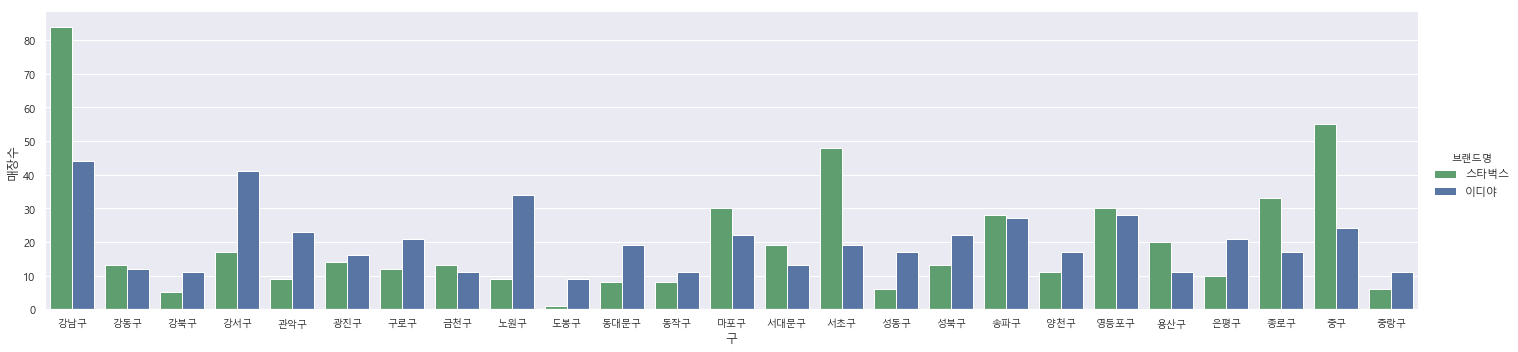

In [141]:
palette={'스타벅스':'C2', '이디야':'C0'}
sns.catplot(x='구',y='매장수',hue='브랜드명',kind='bar', data=df_cafe_seoul_input, aspect=4, palette=palette)

<br>

# 서울특별시 구별로 전체 매장수(이디야+스타벅스) 시각화

## 02 시각화: seaborn의 catplot(bar)

In [147]:
df_cafe_seoul_input2= pd.DataFrame(
    df_cafe_seoul.groupby(['시군구명'])['상호명'].count()
).reset_index()
df_cafe_seoul_input2.columns=['구','전체 매장수']
df_cafe_seoul_input2.head(3)

,구,전체 매장수
0,강남구,128
1,강동구,25
2,강북구,16


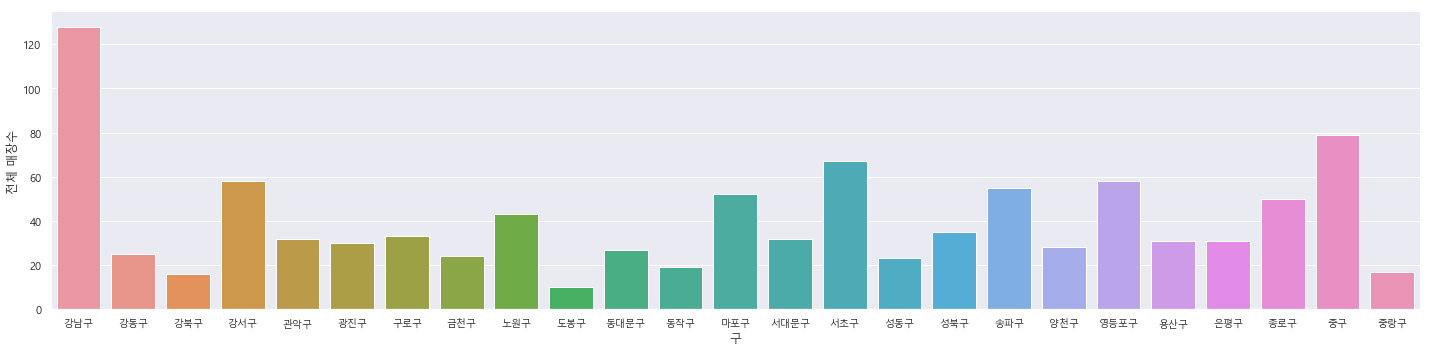

In [160]:
ax=sns.catplot(x='구',y='전체 매장수', 
               kind='bar', data=df_cafe_seoul_input2, 
               aspect=4, )    